<a href="https://colab.research.google.com/github/smurillo1/pagila/blob/main/pagila_saviomurillodiasbastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE - BTIME

### Tarefa 2: Análise de Dados em Python

- Conecte-se à base de dados “Pagila” usando Python.
- Crie uma visualização que mostre a distribuição da duração dos aluguéis dos filmes na base de dados.
- Realize uma análise de tendências mensais no número de aluguéis de filmes ao longo do tempo e apresente os resultados em um gráfico de linha.

Iniciaremos instalando a biblioteca psycopg2, responsável pela conexão com a base de dados.

In [8]:
pip install psycopg2


# Conexão com o Banco de Dados

Vamos utilizar algumas tabelas da base 'pagila' para realizar uma análise de tendência dos alugueis de filmes.

In [9]:
#conexao com o banco
import psycopg2
#tratamento de dados
import pandas as pd
#visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Parâmetros de conexão
hostname = "dev-btime-db-001.postgres.database.azure.com"
database = "pagila"
username = "savio"
password = "2Yj6uopGVlF3TrAO"

# Função para executar consultas SQL e criar DataFrames
def execute_query_and_create_dataframe(query):
    try:
        conn = psycopg2.connect(
            host=hostname,
            database=database,
            user=username,
            password=password,
            port=5432
        )

        # cursor para executar consultas SQL
        cursor = conn.cursor()
        cursor.execute(query)

        # exibir os resultados
        rows = cursor.fetchall()

        # Criar um DataFrame a partir dos resultados
        df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

        # Fechar o cursor e a conexão
        cursor.close()
        conn.close()

        return df

    except Exception as e:
        print("Erro ao conectar ao banco de dados:", e)
        return None

# Exemplo de consulta e criação de DataFrame
query1 = "SELECT * FROM rental"
df_rental = execute_query_and_create_dataframe(query1)

# Exemplo de outra consulta e criação de DataFrame
query2 = "SELECT * FROM payment"
df_pay = execute_query_and_create_dataframe(query2)

# Tratamento de dados


In [11]:
df_pay.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00
1,16065,274,1,147,2.99,2022-01-25 12:14:16.895377+00:00
2,16109,297,2,143,0.99,2022-01-28 00:49:49.128218+00:00
3,16195,344,2,157,2.99,2022-01-31 05:58:51.176578+00:00
4,16202,348,2,821,0.99,2022-01-26 16:52:41.359433+00:00


In [12]:
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16049 entries, 0 to 16048
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   payment_id    16049 non-null  int64              
 1   customer_id   16049 non-null  int64              
 2   staff_id      16049 non-null  int64              
 3   rental_id     16049 non-null  int64              
 4   amount        16049 non-null  object             
 5   payment_date  16049 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 752.4+ KB


In [13]:
df_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2022-05-24 21:54:33+00:00,1525,459,2022-05-28 18:40:33+00:00,1,2022-02-16 02:30:53+00:00
1,3,2022-05-24 22:03:39+00:00,1711,408,2022-06-01 21:12:39+00:00,1,2022-02-16 02:30:53+00:00
2,4,2022-05-24 22:04:41+00:00,2452,333,2022-06-03 00:43:41+00:00,2,2022-02-16 02:30:53+00:00
3,5,2022-05-24 22:05:21+00:00,2079,222,2022-06-02 03:33:21+00:00,1,2022-02-16 02:30:53+00:00
4,6,2022-05-24 22:08:07+00:00,2792,549,2022-05-27 00:32:07+00:00,1,2022-02-16 02:30:53+00:00


In [14]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   rental_id     16044 non-null  int64              
 1   rental_date   16044 non-null  datetime64[ns, UTC]
 2   inventory_id  16044 non-null  int64              
 3   customer_id   16044 non-null  int64              
 4   return_date   15861 non-null  datetime64[ns, UTC]
 5   staff_id      16044 non-null  int64              
 6   last_update   16044 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3), int64(4)
memory usage: 877.5 KB


In [15]:
#mesclando as tabelas de pagamento e aluguel
resultado = pd.merge(df_pay, df_rental, on=['rental_id'], how='left')

In [16]:
#selecionando colunas
resultado = resultado[['payment_id', 'customer_id_x', 'staff_id_x',
                       'rental_id', 'amount','payment_date', 'rental_date',
                       'inventory_id','return_date','last_update']]

In [17]:
resultado.head()

,payment_id,customer_id_x,staff_id_x,rental_id,amount,payment_date,rental_date,inventory_id,return_date,last_update
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00,2022-05-25 15:48:24+00:00,2970,2022-05-27 10:29:24+00:00,2022-02-16 02:30:53+00:00
1,16065,274,1,147,2.99,2022-01-25 12:14:16.895377+00:00,2022-05-25 23:17:50+00:00,633,2022-05-29 22:21:50+00:00,2022-02-16 02:30:53+00:00
2,16109,297,2,143,0.99,2022-01-28 00:49:49.128218+00:00,2022-05-25 22:45:52+00:00,847,2022-05-27 20:41:52+00:00,2022-02-16 02:30:53+00:00
3,16195,344,2,157,2.99,2022-01-31 05:58:51.176578+00:00,2022-05-26 00:25:21+00:00,887,2022-05-26 20:17:21+00:00,2022-02-16 02:30:53+00:00
4,16202,348,2,821,0.99,2022-01-26 16:52:41.359433+00:00,2022-05-29 20:31:12+00:00,3380,2022-06-04 21:49:12+00:00,2022-02-16 02:30:53+00:00


In [18]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16049 entries, 0 to 16048
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   payment_id     16049 non-null  int64              
 1   customer_id_x  16049 non-null  int64              
 2   staff_id_x     16049 non-null  int64              
 3   rental_id      16049 non-null  int64              
 4   amount         16049 non-null  object             
 5   payment_date   16049 non-null  datetime64[ns, UTC]
 6   rental_date    16049 non-null  datetime64[ns, UTC]
 7   inventory_id   16049 non-null  int64              
 8   return_date    15866 non-null  datetime64[ns, UTC]
 9   last_update    16049 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), int64(5), object(1)
memory usage: 1.3+ MB


In [19]:
resultado.duplicated().sum() #consulta de duplicatas

0

In [20]:
resultado.isnull().sum() #identificando nulos

payment_id         0
customer_id_x      0
staff_id_x         0
rental_id          0
amount             0
payment_date       0
rental_date        0
inventory_id       0
return_date      183
last_update        0
dtype: int64

Na linha acima foi possível identificar nulos na coluna que registra as devoluções dos filmes alugados. Analisaremos se é pertinente continuar ou não com esses registros.

In [21]:
#separando datas em dias, meses, ano e hora das colunas de aluguem e devolução

resultado['day_rental'] = resultado['rental_date'].dt.day
resultado['month_rental'] = resultado['rental_date'].dt.month
resultado['year_rental'] = resultado['rental_date'].dt.year
resultado['hour_rental'] = resultado['rental_date'].dt.strftime('%H:%M:%S')

resultado['day_return'] = resultado['return_date'].dt.day
resultado['month_return'] = resultado['return_date'].dt.month
resultado['year_return'] = resultado['return_date'].dt.year
resultado['hour_return'] = resultado['return_date'].dt.strftime('%H:%M:%S')

resultado['day_payment'] = resultado['payment_date'].dt.day
resultado['month_payment'] = resultado['payment_date'].dt.month
resultado['year_payment'] = resultado['payment_date'].dt.year
resultado['hour_payment'] = resultado['payment_date'].dt.strftime('%H:%M:%S')

In [22]:
resultado.sample(3)

,payment_id,customer_id_x,staff_id_x,rental_id,amount,payment_date,rental_date,inventory_id,return_date,last_update,...,year_rental,hour_rental,day_return,month_return,year_return,hour_return,day_payment,month_payment,year_payment,hour_payment
5023,27250,451,1,5005,3.99,2022-03-20 07:39:19.069349+00:00,2022-07-09 00:21:44+00:00,3034,2022-07-14 19:27:44+00:00,2022-02-16 02:30:53+00:00,...,2022,00:21:44,14.0,7.0,2022.0,19:27:44,20,3,2022,07:39:19
9226,21158,440,2,15264,0.99,2022-05-03 21:47:15.164591+00:00,2022-08-22 17:27:38+00:00,4459,2022-08-24 11:39:38+00:00,2022-02-16 02:30:53+00:00,...,2022,17:27:38,24.0,8.0,2022.0,11:39:38,3,5,2022,21:47:15
11243,17152,246,1,699,3.99,2022-06-24 12:25:27.401184+00:00,2022-05-29 01:11:44+00:00,130,2022-06-04 19:23:44+00:00,2022-02-16 02:30:53+00:00,...,2022,01:11:44,4.0,6.0,2022.0,19:23:44,24,6,2022,12:25:27


In [23]:
# Renomeando colunas
resultado.rename(columns={'staff_id_x': 'staff_id', 'customer_id_x': 'customer_id'}, inplace=True)

In [24]:
resultado['amount'] = resultado['amount'].astype('float')
#resultado['month_return'] = resultado['month_return'].astype('int')

Como separamos a coluna 'return_date' em dia, mes, ano e hora. Os nulos presentes na coluna inteira foram replicados nas colunas geradas.

In [25]:
resultado.isnull().sum()

payment_id         0
customer_id        0
staff_id           0
rental_id          0
amount             0
payment_date       0
rental_date        0
inventory_id       0
return_date      183
last_update        0
day_rental         0
month_rental       0
year_rental        0
hour_rental        0
day_return       183
month_return     183
year_return      183
hour_return      183
day_payment        0
month_payment      0
year_payment       0
hour_payment       0
dtype: int64

Criamos um df apenas com as linhas que possuem nulos para identificar um padrão.

In [26]:
#criando um df apenas com os nulos
colunas_na = resultado[resultado.isna().any(axis=1)]

In [27]:
colunas_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 715 to 16048
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   payment_id     183 non-null    int64              
 1   customer_id    183 non-null    int64              
 2   staff_id       183 non-null    int64              
 3   rental_id      183 non-null    int64              
 4   amount         183 non-null    float64            
 5   payment_date   183 non-null    datetime64[ns, UTC]
 6   rental_date    183 non-null    datetime64[ns, UTC]
 7   inventory_id   183 non-null    int64              
 8   return_date    0 non-null      datetime64[ns, UTC]
 9   last_update    183 non-null    datetime64[ns, UTC]
 10  day_rental     183 non-null    int64              
 11  month_rental   183 non-null    int64              
 12  year_rental    183 non-null    int64              
 13  hour_rental    183 non-null    object         

Vamos observar em qual periodo esses dados mais se concentram


In [28]:
colunas_na['month_rental'].value_counts()

2    182
8      1
Name: month_rental, dtype: int64

99% dos valores nulos estão acumulados no mês de Fevereiro.

Tendo em vista que nosso dataframe principal possui 16000 linhas e o mês de Fevereiro apenas 182 registros, vamos optar por excluí-los, tendo em vista que a quantidade de aluguéis nesse periodo não será relevante para a análise dado o volume de dados presentes. Podemos observar melhor isso quando plotamos um histograma com a quantidade de aluguéis e devoluções por mês.


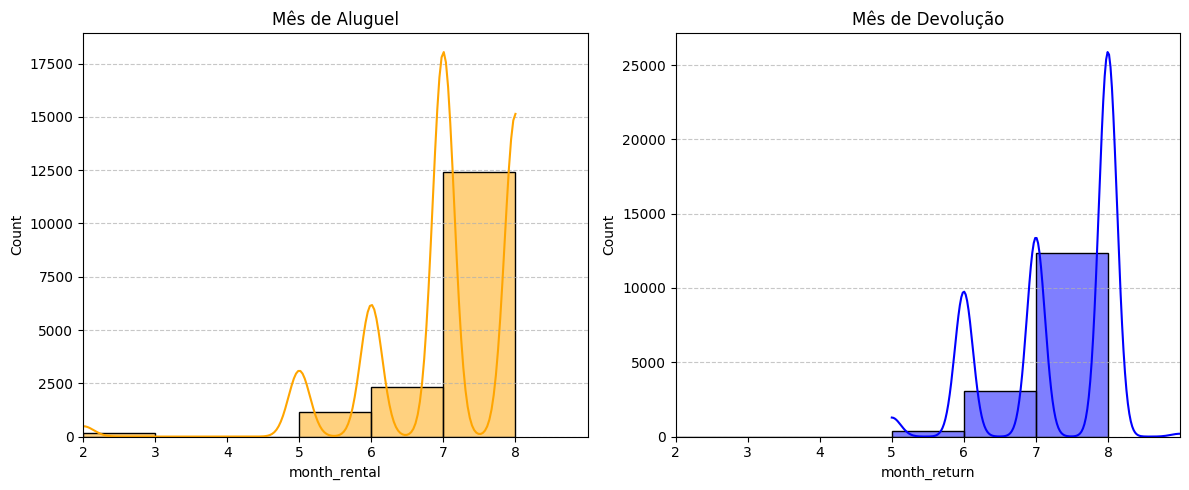

In [29]:
# definindo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#  gráfico à esquerda
sns.histplot(resultado['month_rental'], bins=range(2, 9), kde=True, color='orange', ax=axes[0])
axes[0].set_xticks(range(2, 9))
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_title('Mês de Aluguel')
axes[0].set_xlim(2, 9)


#  gráfico à direita
sns.histplot(resultado['month_return'], bins=range(2, 9), kde=True, color='blue', ax=axes[1])
axes[1].set_xticks(range(2, 9))
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_title('Mês de Devolução')
axes[1].set_xlim(2, 9)

# Ajuste do layout
plt.tight_layout()

# exibir
plt.show()

No gráfico à esquerda, observamos que há alguns aluguéis registrados durante o mês de fevereiro, mas não há registros de aluguéis em março e abril, o que indica um período de baixo faturamento para a locadora. Dado o baixo número de aluguéis em fevereiro e o período sem registros em março e abril, decidimos focar apenas nos meses seguintes, a partir de maio.

Além disso, é importante notar a ausência de devoluções antes do mês de maio. Isso pode ser um sinal de que ocorreu algum evento que impediu as devoluções, mas essa afirmação poderá ser confirmada quando analisarmos a duração dos aluguéis mais adiante

In [30]:
#Excluindo valores nulos
resultado = resultado.dropna()

#conferindo nulos novamente
resultado.isnull().sum()

payment_id       0
customer_id      0
staff_id         0
rental_id        0
amount           0
payment_date     0
rental_date      0
inventory_id     0
return_date      0
last_update      0
day_rental       0
month_rental     0
year_rental      0
hour_rental      0
day_return       0
month_return     0
year_return      0
hour_return      0
day_payment      0
month_payment    0
year_payment     0
hour_payment     0
dtype: int64

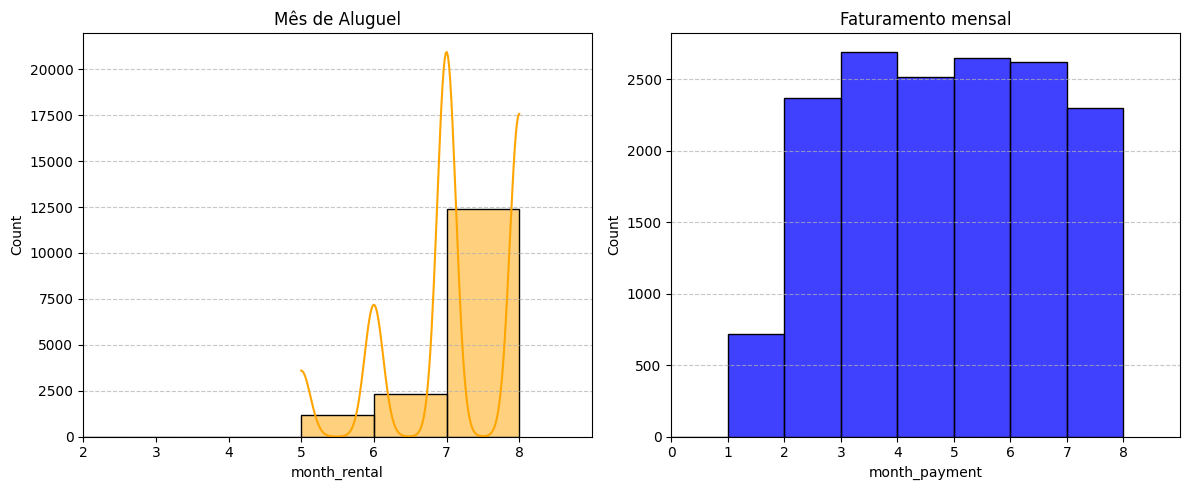

In [31]:
# definindo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#  gráfico à esquerda
sns.histplot(resultado['month_rental'], bins=range(0, 9), kde=True, color='orange', ax=axes[0])
axes[0].set_xticks(range(0, 9))
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_title('Mês de Aluguel')
axes[0].set_xlim(2, 9)


#  gráfico à direita
sns.histplot(resultado['month_payment'], bins=range(0, 9), kde=False, color='blue', ax=axes[1])
axes[1].set_xticks(range(0, 9))
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_title('Faturamento mensal')
axes[1].set_xlim(0, 9)

# Ajuste do layout
plt.tight_layout()

# exibir
plt.show()

Existe também, uma incoerência entre os dados de faturamento e a quantidade de aluguéis por mês, no entanto, para obter uma análise mais assertiva, iremos abordar apenas os intervalos a partir de maio.

In [32]:
#criando um df com o faturamento por mês
faturamento = resultado.groupby('month_rental').amount.sum().reset_index()
faturamento = faturamento.sort_values(by='month_rental')
faturamento

,month_rental,amount
0,5,4823.44
1,6,9629.89
2,7,28510.56
3,8,23934.45


In [33]:
#criando um df com os alguéis por mês
line_result = resultado['month_rental'].value_counts().sort_values().reset_index()
line_result.rename(columns={'index': 'month'}, inplace=True)
line_result = line_result.sort_values(by='month')
line_result

,month,month_rental
0,5,1156
1,6,2311
3,7,6744
2,8,5655


In [34]:
#mesclando tabelas de faturamento e alguéis mensais
line_result = pd.merge(line_result, faturamento, on=line_result['month'], how='inner')

#visualizando
line_result

,key_0,month,month_rental_x,month_rental_y,amount
0,5,5,1156,5,4823.44
1,6,6,2311,6,9629.89
2,7,7,6744,7,28510.56
3,8,8,5655,8,23934.45


In [35]:
#excluindo colunas inuteis
line_result = line_result.drop(['key_0','month_rental_y'], axis=1)

#renomeando colunas
line_result.rename(columns={'month_rental_x': 'month_rental'}, inplace=True)

In [36]:
line_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         4 non-null      int64  
 1   month_rental  4 non-null      int64  
 2   amount        4 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 128.0 bytes


In [37]:
#formatando contagem de alugueis
line_result['month_rental'] = line_result['month_rental'].astype('float')

In [38]:
#dataframe de algueis e faturamento mensais
line_result

,month,month_rental,amount
0,5,1156.0,4823.44
1,6,2311.0,9629.89
2,7,6744.0,28510.56
3,8,5655.0,23934.45


# Entregáveis


Inicialmente, vamos observar a distribuição da duração dos aluguéis dos filmes na base de dados.

In [39]:
#formatando colunas para criar relação
resultado['rental_date'] = pd.to_datetime(resultado['rental_date'])
resultado['return_date'] = pd.to_datetime(resultado['return_date'])

#relação entre data do aluguel e data da devolução
resultado['rental_period'] = (-1)*(resultado['rental_date'] - resultado['return_date']).dt.days
resultado['rental_period'] = resultado['rental_period'].sort_values()

resultado['rental_period'] = resultado['rental_period'].astype('object')

#separando informações em um novo df para facilitar manipulação
interval_return = resultado['rental_period'].value_counts().reset_index()
interval_return.rename(columns={'index': 'period', 'rental_period':'count'}, inplace=True)
interval_return = interval_return.sort_values(by='period')

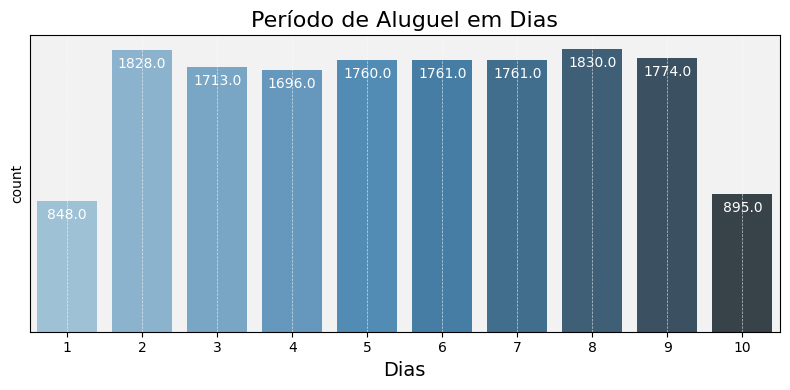

In [40]:
cores = sns.color_palette("Blues_d", len(interval_return))

# plotando o grafico
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='period', y='count', data=interval_return, palette=cores)

# gráfico
plt.xlabel('Dias', fontsize=14)
plt.title('Período de Aluguel em Dias', fontsize=16)
plt.xticks(rotation=0)
plt.yticks([])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# fundo
plt.gca().set_facecolor('#f2f2f2')

#  grade de fundo
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

#  rótulos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', fontsize=10, color='w', xytext=(0, -10), textcoords='offset points')

plt.tight_layout()
plt.show()

Entende-se que o período de aluguéis dura de 2 a 9 dias, podendo haver casos que duram 1 ou 10 dias, porém em menor escala.

Um ponto a se apegar é o volume de aluguéis e devoluções por mês, o que demonstra uma movimentação crescente na plataforma, como podemos observar abaixo:


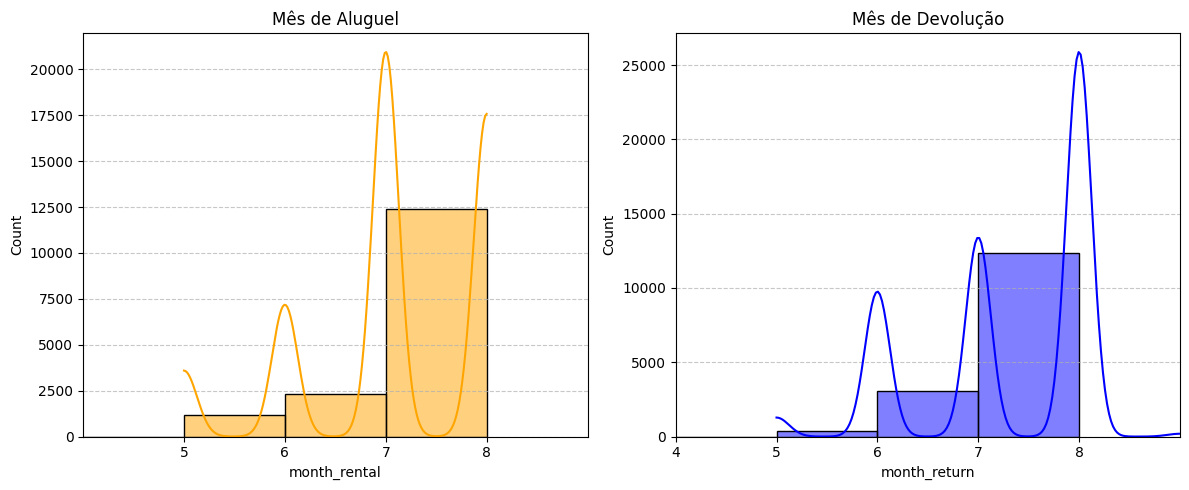

In [41]:
# definindo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#  gráfico à esquerda
sns.histplot(resultado['month_rental'], bins=range(2, 9), kde=True, color='orange', ax=axes[0])
axes[0].set_xticks(range(5, 9))
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_title('Mês de Aluguel')
axes[0].set_xlim(4, 9)


#  gráfico à direita
sns.histplot(resultado['month_return'], bins=range(2, 9), kde=True, color='blue', ax=axes[1])
axes[1].set_xticks(range(2, 9))
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_title('Mês de Devolução')
axes[1].set_xlim(4, 9)

# Ajuste do layout
plt.tight_layout()

# exibir
plt.show()

Uma maneira de corrigir a discrepância entre os dados de faturamento e contagem de aluguéis, foi agrupar o valores de aluguel pela data registrada do mesmo e não do pagamento, assim, foi possível comprovar que ambos estão bem correlacionados.

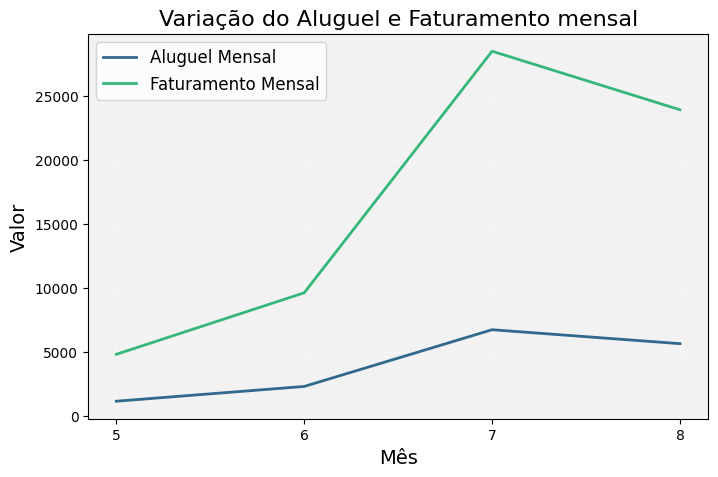

In [42]:

plt.figure(figsize=(8, 5))

# paleta de cores personalizada
colors = sns.color_palette("viridis", n_colors=2)

# graf linha aluguel
sns.lineplot(x=line_result['month'], y=line_result['month_rental'], color=colors[0], linewidth=2, label='Aluguel Mensal')

# graf linha faturamento
sns.lineplot(x=line_result['month'], y=line_result['amount'], color=colors[1], linewidth=2, label='Faturamento Mensal')

#  o gráfico
plt.title('Variação do Aluguel e Faturamento mensal', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.xticks(range(5, 9))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# fundo
plt.gca().set_facecolor('#f2f2f2')

#  grade de fundo
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

#  legenda
plt.legend(loc='upper left', fontsize=12)

plt.show()


O resultado da análise é que o movimento na plataforma cresceu nos últimos meses e agora segue um movimento de estabilização.